In [40]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder 


In [43]:
data =  pd.read_csv(r'C:\dataset\User_Data.csv')  


In [8]:

data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [44]:

print(data.head(10))   

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [45]:
print(data.isnull().sum()) #no null values are present 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [11]:

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [46]:
x = data.iloc[:, [2, 3]]
y = data.iloc[:,4]  


In [47]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 0) 
     

In [48]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
pred = naive_bayes.predict(x_test)  

In [49]:
print(pred)  


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 1 0 0 1]


In [50]:
print(y_test)  

132    0
309    0
341    0
196    0
246    0
      ..
136    0
275    1
126    0
198    0
299    1
Name: Purchased, Length: 160, dtype: int64


In [51]:
matrix =  confusion_matrix(y_test,pred,labels = naive_bayes.classes_)
print(matrix)

[[95  6]
 [13 46]]


In [52]:
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1) 

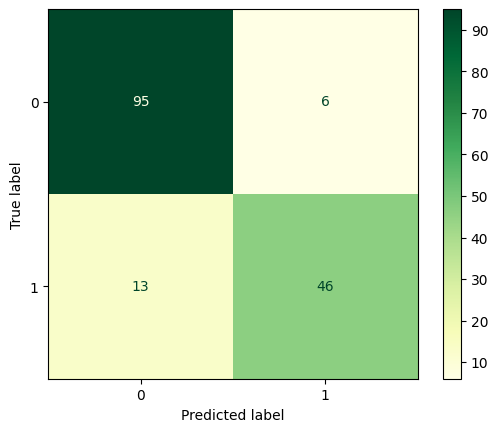

In [53]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=naive_bayes.classes_)
conf_matrix.plot(cmap=plt.cm.YlGn)
plt.show()

In [54]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp)) 


Accuracy: 0.88
Error Rate:  0.11875
Sensitivity (Recall or True positive rate) : 0.7796610169491526
Specificity (True negative rate) : 0.9405940594059405
Precision (Positive predictive value) : 0.8846153846153846
False Positive Rate : 0.0594059405940594
